In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

%reload_ext autoreload
%autoreload 2

In [66]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, CSVLogger

In [67]:
tf.__version__

'2.0.0-dev20190315'

In [68]:
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [69]:
dataframe = pd.read_pickle('preprocessed_oxaliplatin.csv.pickle')
dataframe.head()
len(dataframe.columns)

,sex_1,sex_2,sex_3,sex_-1,report type_1,report type_2,report type_3,report type_-1,qualification_1,qualification_2,...,reason_for_use_-1,no,reports,age,weight,height,divided_dose_frequency,primary_disease,adverse event,dosage
640719,0,1,0,0,0,1,0,0,1,0,...,0,1,2,50.0,50.0,160.0,1.0,1,1,125.0
640720,0,1,0,0,0,1,0,0,1,0,...,0,1,2,50.0,50.0,160.0,1.0,0,2,125.0
640721,0,1,0,0,0,1,0,0,1,0,...,0,1,2,50.0,50.0,160.0,1.0,0,3,125.0
640722,0,1,0,0,0,1,0,0,1,0,...,0,1,2,50.0,50.0,160.0,1.0,0,1,97.5
640723,0,1,0,0,0,1,0,0,1,0,...,0,1,2,50.0,50.0,160.0,1.0,0,2,97.5


137

In [70]:
y = dataframe['adverse event']
y

640719      1
640720      2
640721      3
640722      1
640723      2
640724      3
644554      4
649937      3
649938      1
649940      3
649941      1
649979      3
649980      1
649981      5
649982      3
649983      1
649984      5
650006      3
650007      1
650008      2
650009      5
650172      1
650173      3
650182      3
653971      1
653974      1
653977      1
653980      1
653983      1
653986      1
           ..
7108060     7
7108172     6
7108174     6
7108176     6
7108226     7
7108227     7
7108228     7
7108229     7
7108230     7
7108231     7
7108232     7
7108257     7
7108258     7
7108259     7
7108260     7
7108261     7
7108262     7
7108263     7
7108264     7
7108265     7
7108266     7
7108267     7
7108268     7
7114287    10
7114288    10
7114289    10
7114290    10
7114291    10
7114292    10
7114293    10
Name: adverse event, Length: 31652, dtype: int64

In [71]:
X = dataframe.drop('adverse event', axis=1)
X.head()

,sex_1,sex_2,sex_3,sex_-1,report type_1,report type_2,report type_3,report type_-1,qualification_1,qualification_2,...,reason_for_use_55,reason_for_use_-1,no,reports,age,weight,height,divided_dose_frequency,primary_disease,dosage
640719,0,1,0,0,0,1,0,0,1,0,...,0,0,1,2,50.0,50.0,160.0,1.0,1,125.0
640720,0,1,0,0,0,1,0,0,1,0,...,0,0,1,2,50.0,50.0,160.0,1.0,0,125.0
640721,0,1,0,0,0,1,0,0,1,0,...,0,0,1,2,50.0,50.0,160.0,1.0,0,125.0
640722,0,1,0,0,0,1,0,0,1,0,...,0,0,1,2,50.0,50.0,160.0,1.0,0,97.5
640723,0,1,0,0,0,1,0,0,1,0,...,0,0,1,2,50.0,50.0,160.0,1.0,0,97.5


In [72]:
X = preprocessing.scale(X)
X

/Users/takayoshi-endo/.pyenv/versions/3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


array([[-1.18162811e+00,  1.18170487e+00,  0.00000000e+00, ...,
        -5.62090548e-03, -2.13687118e-01, -1.61032403e-02],
       [-1.18162811e+00,  1.18170487e+00,  0.00000000e+00, ...,
        -5.62090548e-03, -2.64186425e-01, -1.61032403e-02],
       [-1.18162811e+00,  1.18170487e+00,  0.00000000e+00, ...,
        -5.62090548e-03, -2.64186425e-01, -1.61032403e-02],
       ...,
       [ 8.46289957e-01, -8.46234980e-01,  0.00000000e+00, ...,
        -5.62090548e-03,  1.05931646e+01, -1.13273795e-01],
       [ 8.46289957e-01, -8.46234980e-01,  0.00000000e+00, ...,
        -5.62090548e-03,  3.67475951e+00, -1.13273795e-01],
       [ 8.46289957e-01, -8.46234980e-01,  0.00000000e+00, ...,
        -5.62090548e-03,  8.52269298e+00, -1.13273795e-01]])

In [73]:
y.value_counts()
y = y.values
y

1     9574
3     6113
6     2639
9     2613
2     2299
10    2161
5     2130
7     1782
4     1258
8     1083
Name: adverse event, dtype: int64

array([ 1,  2,  3, ..., 10, 10, 10])

In [74]:
num_classes = 11
y = tf.keras.utils.to_categorical(y, num_classes)
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

/Users/takayoshi-endo/.pyenv/versions/3.6.8/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [83]:
def build_multilayer_perceptron():
    model = Sequential()
    model.add(Dense(32, input_shape=(136,)))
    model.add(Activation('relu'))
    model.add(Dense(11))
    model.add(Activation('softmax'))
    return model

In [84]:
model = build_multilayer_perceptron()

In [85]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [86]:
X_train.shape, y_train.shape

((25321, 136), (25321, 11))

In [87]:
es = EarlyStopping(monitor='val_loss', patience=10)
csv_logger = CSVLogger('training.log')
hist = model.fit(X_train, y_train,
                 batch_size=1,
                 epochs=50,
                 verbose=1,
                 validation_split=0.1,
                 callbacks=[es, csv_logger])

Train on 22788 samples, validate on 2533 samples
Epoch 1/50
22788/22788 [==============================] - 33s 1ms/sample - loss: 1.4297 - accuracy: 0.4738 - val_loss: 1.3630 - val_accuracy: 0.4955
Epoch 2/50
22788/22788 [==============================] - 34s 1ms/sample - loss: 1.3181 - accuracy: 0.5001 - val_loss: 1.3090 - val_accuracy: 0.5041s - los - ETA: 1s - loss: 1.3178 - accuracy - ETA: 1s - loss: 1.3177 - accura - ETA - ETA: 0s - loss: 1.3185 
Epoch 3/50
22788/22788 [==============================] - 31s 1ms/sample - loss: 1.2788 - accuracy: 0.5086 - val_loss: 1.2879 - val_accuracy: 0.5109
Epoch 4/50
22788/22788 [==============================] - 31s 1ms/sample - loss: 1.2613 - accuracy: 0.5143 - val_loss: 1.2659 - val_accuracy: 0.5093- loss: 1.2605 - accuracy: 0.51 - ETA: 0s - loss: 1
Epoch 5/50
22788/22788 [==============================] - 32s 1ms/sample - loss: 1.2442 - accuracy: 0.5213 - val_loss: 1.2722 - val_accuracy: 0.5101
Epoch 6/50
22788/22788 [======================

In [89]:
score = model.evaluate(X, y, verbose=0)
model.metrics_names[1]
score[1] * 100

'accuracy'

55.314040184020996

Text(0.5, 0, 'epoch')

Text(0, 0.5, 'acc')

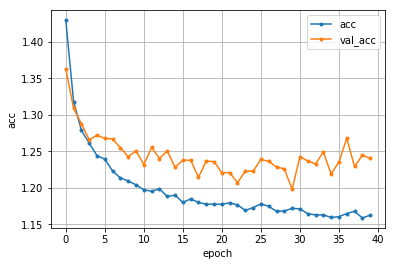

In [90]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='acc')
plt.plot(range(epochs), val_loss, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


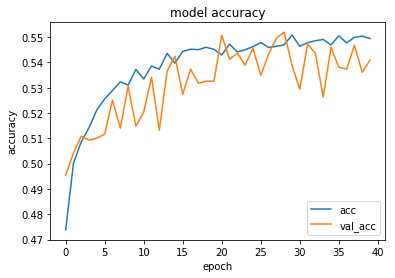

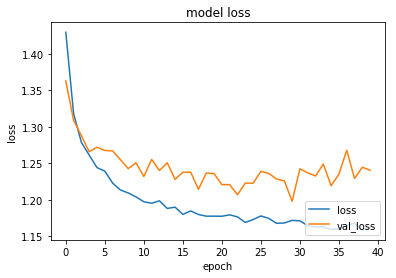

In [91]:
def plot_history(history):
    print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

# 学習履歴をプロット
plot_history(hist)